In [1]:
print("start")

!pip install rasterio matplotlib numpy opencv-python

import numpy as np
import cv2
import matplotlib.pyplot as plt
import rasterio
from google.colab import files
import os
import zipfile

print("enviro_ready")

Start
Enviro_ready


In [3]:
print("step1")

uploaded = files.upload()

zip_filename = list(uploaded.keys())[0]
with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
    zip_ref.extractall("/content/dataset")

dataset_path = "/content/dataset"
print(f"Dataset extracted to {dataset_path}")

step1


Saving wheat2.zip to wheat2.zip
Dataset extracted to /content/dataset


In [2]:
print("step2")

tif_files = []

for root, dirs, files_in_dir in os.walk(dataset_path):
    for file in files_in_dir:
        if file.endswith(".tif"):
            tif_files.append(os.path.join(root, file))

print(f"Found {len(tif_files)} .tif files")
print(tif_files[:5])

step2


NameError: name 'os' is not defined

In [3]:
print("step3")

test_file = tif_files[0]
with rasterio.open(test_file) as src:
    image = src.read()
    profile = src.profile

image = np.transpose(image, (1, 2, 0))
print(f"Loaded image shape: {image.shape}")

if image.shape[2] >= 4:
    red = image[:, :, 0]
    nir = image[:, :, 3]
else:
    red = image[:, :, 0]
    nir = image[:, :, 2]
green = image[:, :, 1]

step3


IndexError: list index out of range

In [6]:
print("step4")

ndvi = (nir.astype(float) - red.astype(float)) / (nir.astype(float) + red.astype(float) + 1e-5)

grid_size = 10
h, w, _ = image.shape
cell_h = h // grid_size
cell_w = w // grid_size

mean_ndvi = np.zeros((grid_size, grid_size))
mean_green = np.zeros((grid_size, grid_size))

for i in range(grid_size):
    for j in range(grid_size):
        y1 = i * cell_h
        y2 = (i + 1) * cell_h
        x1 = j * cell_w
        x2 = (j + 1) * cell_w

        cell_ndvi = ndvi[y1:y2, x1:x2]
        cell_green = green[y1:y2, x1:x2]

        mean_ndvi[i, j] = np.mean(cell_ndvi)
        mean_green[i, j] = np.mean(cell_green)

print("Mean NDVI Grid:")
print(mean_ndvi)
print("Mean Green Grid:")
print(mean_green)

step4
Mean NDVI Grid:
[[-0.33443327 -0.40467771 -0.30310445 -0.14636748 -0.16739328 -0.175371
  -0.16740433 -0.15715156 -0.13736346 -0.11133586]
 [-0.41000126 -0.34832644 -0.16130935 -0.16119671 -0.19687094 -0.21571753
  -0.21189636 -0.20461082 -0.20685064 -0.17121211]
 [-0.38589813 -0.41633034 -0.35459658 -0.16226905 -0.20582147 -0.20596942
  -0.24197256 -0.22745369 -0.23551735 -0.21148501]
 [-0.3870843  -0.31111059 -0.17383329 -0.16043602 -0.20192347 -0.19192129
  -0.24863516 -0.23193978 -0.24624397 -0.24565491]
 [-0.44487202 -0.38336002 -0.27134155 -0.17273558 -0.22878449 -0.19507237
  -0.25813367 -0.23174778 -0.24403988 -0.23613226]
 [-0.47062064 -0.50006246 -0.46360513 -0.26330081 -0.25005873 -0.18945615
  -0.25700968 -0.22298552 -0.21445822 -0.23236413]
 [-0.43383204 -0.37791073 -0.31536305 -0.24264657 -0.24337407 -0.19756473
  -0.277834   -0.24224601 -0.23259097 -0.25672905]
 [-0.36644518 -0.38221414 -0.42140897 -0.43362167 -0.28355981 -0.2009129
  -0.26373873 -0.22208305 -0.221

step5


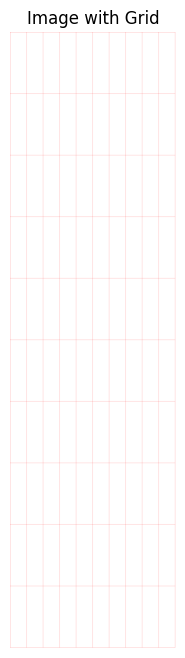

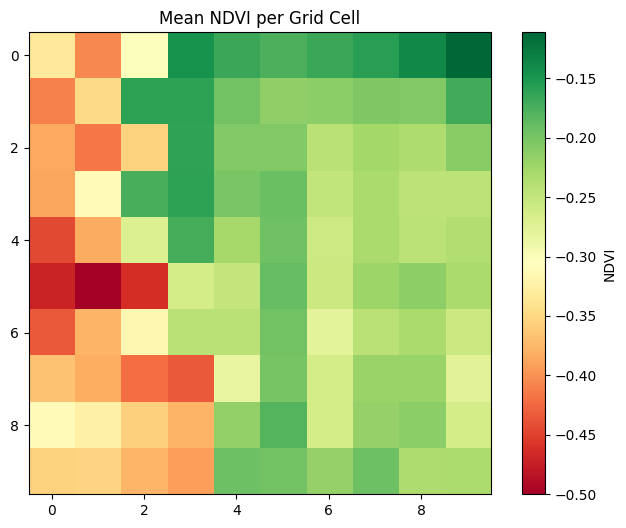

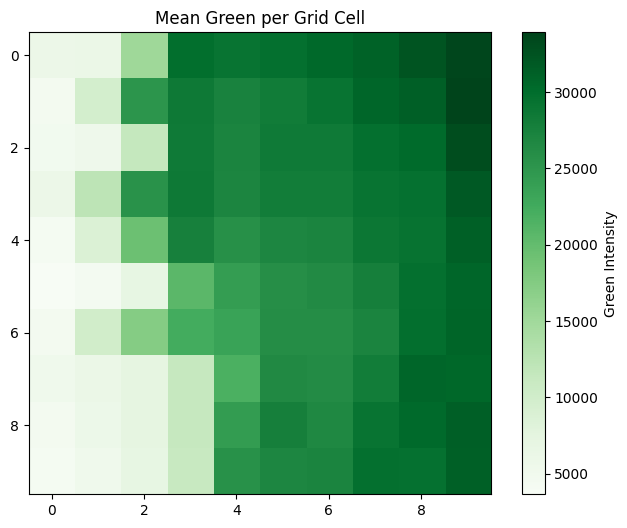

In [9]:
print("step5")

if len(image.shape) == 2:
    display_img = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)
elif image.shape[2] > 3:
    display_img = image[:, :, :3]
else:
    display_img = image.copy()

grid_img = display_img.copy()
h, w, _ = grid_img.shape
grid_size = 10

cell_h = h // grid_size
cell_w = w // grid_size

for i in range(grid_size):
    for j in range(grid_size):
        y1 = i * cell_h
        y2 = (i + 1) * cell_h
        x1 = j * cell_w
        x2 = (j + 1) * cell_w
        cv2.rectangle(grid_img, (x1, y1), (x2, y2), (255, 0, 0), 1)

plt.figure(figsize=(8,8))
plt.title("Image with Grid")
plt.imshow(grid_img)
plt.axis('off')
plt.show()

plt.figure(figsize=(8,6))
plt.title("Mean NDVI per Grid Cell")
plt.imshow(mean_ndvi, cmap='RdYlGn')
plt.colorbar(label="NDVI")
plt.show()

plt.figure(figsize=(8,6))
plt.title("Mean Green per Grid Cell")
plt.imshow(mean_green, cmap='Greens')
plt.colorbar(label="Green Intensity")
plt.show()

step6


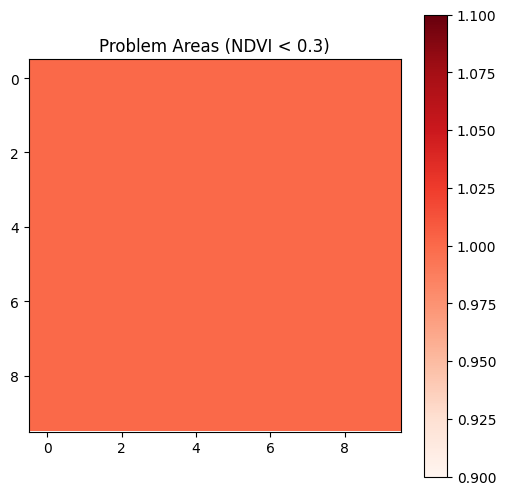

Finish!


In [10]:
print("step6")

ndvi_threshold = 0.3
problem_mask = mean_ndvi < ndvi_threshold

plt.figure(figsize=(6,6))
plt.title("Problem Areas (NDVI < 0.3)")
plt.imshow(problem_mask, cmap='Reds')
plt.colorbar()
plt.show()

print("Finish!")